In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as sns

Benchmark

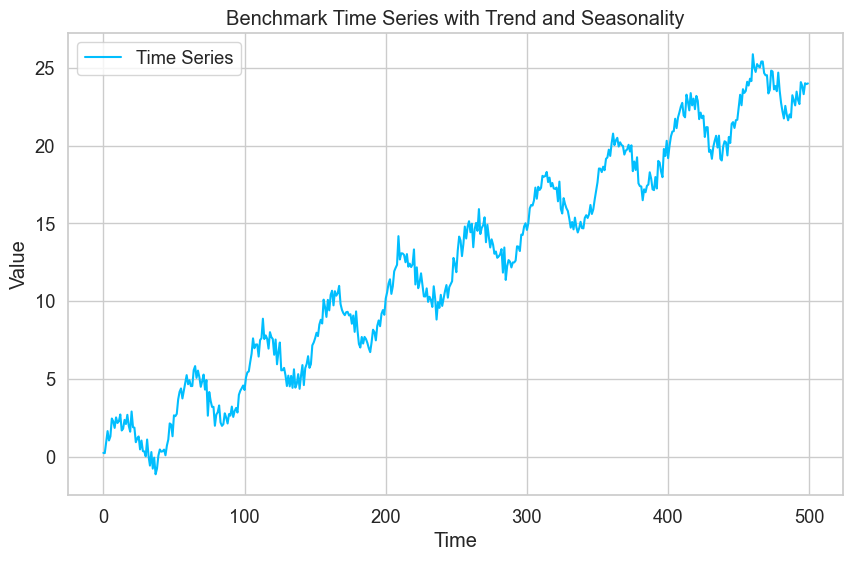

In [2]:
from functions_for_notebook import create_benchmark_data

%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

Colour_Palette = ["#01BEFE", "#FF7D00", "#FFDD00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(Colour_Palette))

n_points = 500
data, time_series, t = create_benchmark_data(n_points)


# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data["Time"], data["Value"], label="Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Benchmark Time Series with Trend and Seasonality")
plt.legend()
plt.show()

# Save the data to a CSV file
data.to_csv("benchmark_time_series.csv", index=False)

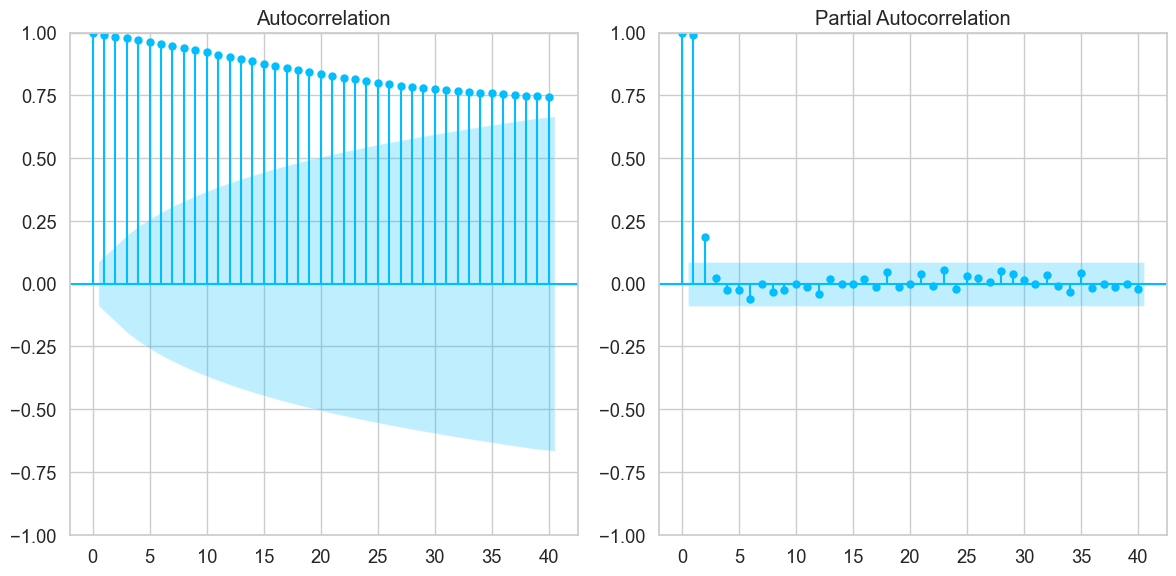

In [3]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data["Value"], ax=plt.gca(), lags=40)
plt.title("Autocorrelation")
plt.subplot(122)
plot_pacf(data["Value"], ax=plt.gca(), lags=40, method="ywm")
plt.title("Partial Autocorrelation")
plt.tight_layout()
plt.show()

SARIMA seasone 50

In [4]:
seasonal_period = 50  # Same as in the data generation
sarima_model = SARIMAX(
    data["Value"], order=(2, 1, 2), seasonal_order=(1, 1, 1, seasonal_period)
).fit()

In [5]:
# Print model summary
print(sarima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Value   No. Observations:                  500
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 50)   Log Likelihood                -377.099
Date:                              Tue, 28 Jan 2025   AIC                            768.198
Time:                                      18:56:28   BIC                            796.947
Sample:                                           0   HQIC                           779.530
                                              - 500                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8032      0.387     -2.074      0.038      -1.562      -0.044
ar.L2         -0.01

In [6]:
# Forecast future values
forecast_steps = 50
forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_index = np.arange(n_points, n_points + forecast_steps)
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

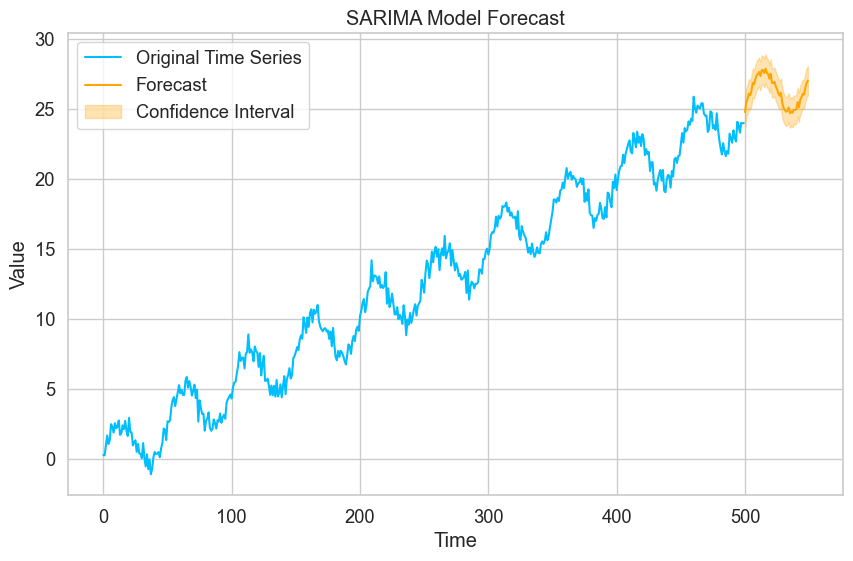

In [7]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data["Time"], data["Value"], label="Original Time Series")
plt.plot(forecast_index, forecast_values, label="Forecast", color="orange")
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="orange",
    alpha=0.3,
    label="Confidence Interval",
)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("SARIMA Model Forecast")
plt.legend()
plt.show()

Dopasowanie SARIMA dla 450 pierwszych wartości

In [8]:
seasonal_period = 50  # Same as in the data generation
sarima_model_450 = SARIMAX(
    data["Value"][:450], order=(2, 1, 2), seasonal_order=(1, 1, 1, seasonal_period)
).fit()

# Forecast future values
forecast_steps = 50
forecast_450 = sarima_model_450.get_forecast(steps=forecast_steps)
forecast_index = np.arange(450, 450 + forecast_steps)
forecast_values = forecast_450.predicted_mean
forecast_ci = forecast_450.conf_int()

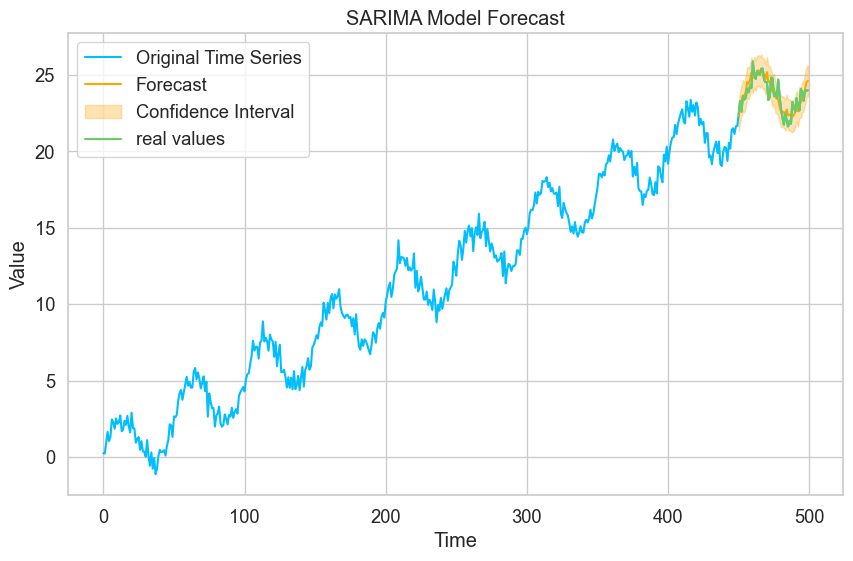

RMSE: 0.5723
R² Score: 0.7050


In [9]:
from functions_for_notebook import stats

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data["Time"], data["Value"], label="Original Time Series")
plt.plot(forecast_index, forecast_values, label="Forecast", color="orange")
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="orange",
    alpha=0.3,
    label="Confidence Interval",
)
plt.plot(data["Time"][450:], data["Value"][450:], label="real values", color="g")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("SARIMA Model Forecast")
plt.legend()
plt.show()

r2, rmse = stats(real_values=data["Value"][450:], test_predictions=forecast_values)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

SARIMA bardzo dobrze dopasowała się do danych, jednak ze względu na charakterystykę Benchmarku jest to oczekiwany rezultat